<a href="https://colab.research.google.com/github/TrombBone/TelecomLabs/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнение 2.1**
Посмотреть с помощью `chap02.ipynb` примеры и пояснения.

# **Упражнение 2.2**
Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется. См. https://en.wikipedia.org/wiki/Sawtooth_wave

Напишите класс, называемый `SawtoothSignal`, расширяющий `signal` и предоставляющий `evaluate` для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?

Ипморт библиотек и файлов:

In [2]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, unbias, normalize, TriangleSignal, SquareSignal

--2023-03-19 13:49:57--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-03-19 13:49:57--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.003s  

2023-03-19 13:49:57 (13.8 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



Напишем класс `SawtoothSignal`, расширяющий `signal` и предоставляющий `evaluate` для оценки пилообразного сигнала. Я буду писать класс, расширяющий `Sinusoid`, так как этот класс уже написан в оригинальном **ThinkDSP**, и он сам расширяет `signal`, тем самым не придётся реализовывать некоторые методы:

In [3]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

**ПРИ ПРОСЛУШИВАНИИ СОЗДАННЫХ МНОЙ ЗВУКОВ СДЕЛАЙТЕ ЗВУК ТИШЕ! БЕРЕГИТЕ УШИ И АУДИОУСТРОЙСТВА!**

Создадим сам пилообразный сигнал:

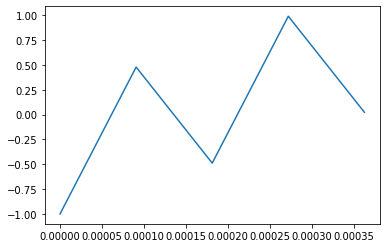

In [4]:
saw_tooth_signal = SawtoothSignal(6666)
saw_tooth_signal.plot()
saw_tooth_signal.make_wave().make_audio()

Выведем его спектограмму:

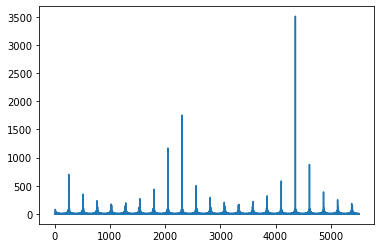

In [5]:
saw_tooth_signal_spectrum = saw_tooth_signal.make_wave().make_spectrum()
saw_tooth_signal_spectrum.plot()

Для сравнения создадим треугольный сигнал и выведем его спектрограмму:


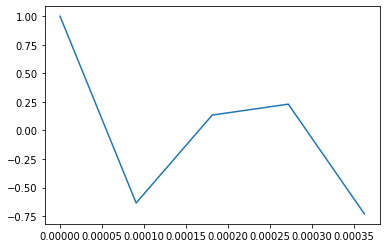

In [6]:
triangle_signal = TriangleSignal(6666)
triangle_signal.plot()
triangle_signal.make_wave().make_audio()

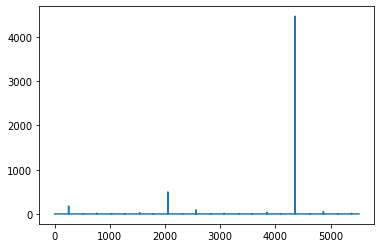

In [7]:
triangle_signal_spectrum = triangle_signal.make_wave().make_spectrum()
triangle_signal_spectrum.plot()

Для сравнения создадим прямоугольный сигнал и выведем его спектрограмму:

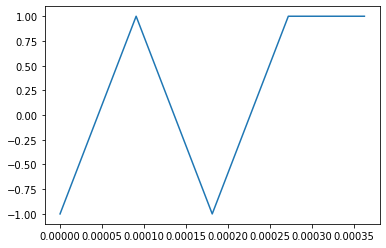

In [17]:
square_signal = SquareSignal(6666)
square_signal.plot()
square_signal.make_wave().make_audio()

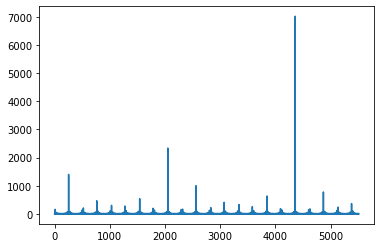

In [18]:
square_signal_spectrum = square_signal.make_wave().make_spectrum()
square_signal_spectrum.plot()

Сравним спектрограммы более точно:

In [19]:
saw_tooth_signal_spectrum.peaks()[:4]

[(3510.322112294313, 4359.0),
 (1755.1616974632996, 2307.0),
 (1170.108510882832, 2052.0),
 (877.5821313655716, 4614.0)]

In [14]:
triangle_signal_spectrum.peaks()[:3]

[(4468.264801580653, 4359.0),
 (496.47410871692296, 2052.0),
 (178.73085328796378, 255.0)]

In [20]:
square_signal_spectrum.peaks()[:3]

[(7018.732634162938, 4359.0),
 (2339.576594881898, 2052.0),
 (1403.7448171221465, 255.0)]

Как мы можем видеть:
* треугольный сигнал от прямоугольного отличают амплитуды,
* прямоугольная ампилтуда обратно пропорциональна частоте,
* треугольная амплитутда обратно пропорционально квадрату частоты,
* пилообразный сигнал от треугольного отличает то, что в пилообразном есть четные гармоники и коэффициент пропорциональности меньше.

# **Упражнение 2.3**

Создайте прямоугольный сигнал 1100 Гц и вычислите `wave` с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

Выполним заданные по заданию условия:

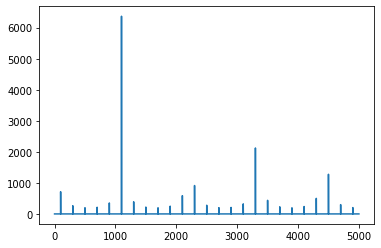

In [21]:
square_signal = SquareSignal(freq=1100)
square_signal_wave = square_signal.make_wave(duration = 1, framerate = 10000)
square_signal_spectrum = square_signal_wave.make_spectrum()
square_signal_spectrum.plot()

Посмотрим пики частот:

In [22]:
square_signal_spectrum.peaks()[:5]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352013, 2300.0),
 (716.3133230172564, 100.0)]

Мы можем видеть, что:
* 3 гармоника должна быть на частоте 5500, но мы видим ее на частоте 4500, это связанно с заверткой на частоте 5000;
* 4 гармоника должна быть на частоте 7700, после 5500 частоты мы оказались на 4500. У нас осталось еще 7700 - 5500 = 2200. Вычитаем 4500 - 2200 = 2300. И видим что дейстивтельно четвертая гармоника находится на 2300;
* 5 гармоника из за биений оказалась на частоте 100 и стала основной, вместо 1100.

Попробуем увеличить выборку в 4 раза и послушать более приближенный звук, который должен получиться при прямоугольном сигнале в 1100 Гц:

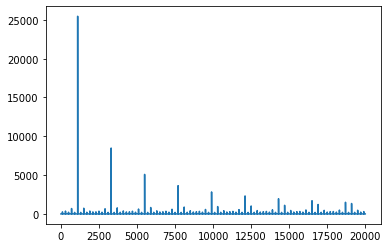

In [23]:
square_signal_wave_x4 = square_signal.make_wave(duration = 1, framerate = 40000)
square_signal_wave_x4.make_spectrum().plot()

Как мы можем видеть, в получившемся сигнале биения намного меньше влияют и соотношения биений к основным частотам намного меньше.

Послушаем звук, который мы сделали по заданию, и сравним его с более приближенным вариантом. Слышно существенную разницу.

Оригинальный звук:

In [24]:
square_signal_wave.make_audio()

Получившийся звук:

In [25]:
square_signal_wave_x4.make_audio()

# **Упражнение 2.4**

Возьмите объект `Spectrum` и распечатайте несколько первых значений `spectrum.fs`. Убедитесь, что они начинаются с нуля, то есть `Spectrim.hs[0]` - амплитута компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:
1. Создайте треугольный сигнал с частотой 440 Гц и `wave` длительностью 0,01 секунд. Распечатайте сигнал.
2. Создайте объект `Spectrum` и распечатайте `Spectrum.hs[0]`. Каковы амплитуда и фаза этого коспонента?
3. Установите `Spectrum.hs[0] = 100`. Как эта операция повлияет на сигнал? Подсказка: `Spectrum` дает метод, называемый `make_wave`, вычисляющий `wave`, соответствующий `Spectrum`.

Выполним требуемые в пункте 1 действия:

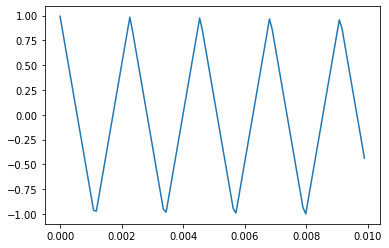

In [33]:
triangle_signal = TriangleSignal(freq=440)
triangle_signal_wave = triangle_signal.make_wave(duration = 0.01)
triangle_signal_wave.plot()

Послушам получившийся сигнал. Для этого увеличим длительность звука:

In [34]:
triangle_signal_long_wave = triangle_signal.make_wave(duration = 0.5)
triangle_signal_long_spectrum = triangle_signal_long_wave.make_spectrum()
triangle_signal_long_wave.make_audio()

Выполним требуемые во 2 пункте действия:

In [36]:
triangle_signal_wave_spectrum = triangle_signal_wave.make_spectrum()
triangle_signal_wave_spectrum.hs[0]

(1.0436096431476471e-14+0j)

3-й пункт:

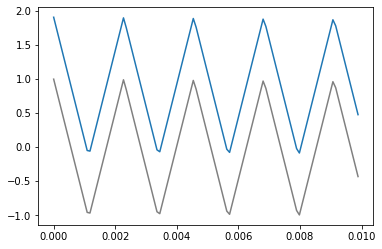

In [37]:
triangle_signal_wave_spectrum.hs[0] = 100
triangle_signal_wave.plot(color='gray')
triangle_signal_wave_spectrum.make_wave().plot()

Послушаем получившийся звук (также увеличим длительность):

In [41]:
triangle_signal_long_spectrum.hs[0] = 5000
triangle_signal_long_wave = triangle_signal_long_spectrum.make_wave()
triangle_signal_long_wave.make_audio()

Слышно, что звук стал немного тише. Чем больше будет число, которое мы приравниваем к `Spectrum.hs[0]`, тем тише будет звук. Это говорит о том, что  нулевой элемент отвечает за смешение. Как и видно из спектрограммы, что звук сместился вниз.

# **Упражнение 2.5**

Напишите функцию, принимающую `Spectrum` как параметр и изменяющую его делением каждого элемента `hs` на соответсвующую частоту из `fs`. Подсказка: поскольку деление на ноль не определено, надо задать `Spectrum.hs[0] = 0`.

Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:
1. Вычислите `Spectrum` и распечатайте его.
2. Измените `Spectrum`, вновь используя свою функцию, и распечатайте его.
3. Используйте `Spectrum.make_wave`, чтобы сделать `wave` из измененного `Spectrum`, и прослушайте его. Как эта операция повлияла на сигнал?

Приступим. Напишем функцию:

In [54]:
def make_diff_spectrum(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

Выполним 1-й пункт из задания, используя треугольный сигнал. Заодно сделаем `wave` и послушаем звук:

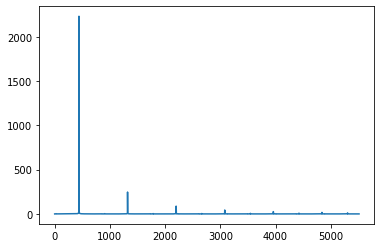

In [57]:
triangle_signal_wave = TriangleSignal().make_wave(duration = 0.5)
triangle_signal_spectrum = triangle_signal_wave.make_spectrum()
triangle_signal_spectrum.plot()
triangle_signal_wave.make_audio()

Выполним 2-й и 3-й пункты:

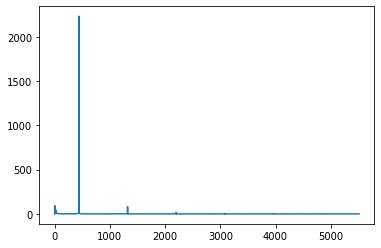

In [58]:
make_diff_spectrum(triangle_signal_spectrum)
triangle_signal_wave = triangle_signal_spectrum.make_wave()
triangle_signal_spectrum.scale(440)
triangle_signal_spectrum.plot()
triangle_signal_wave.make_audio()

Как мы можем видеть, высокие частоты сильно порезались, но основные гармоники остались, только чем больше они по высоте, тем меньше влияют на сигнал, что логично следует из нашей функции.

# **Упражнение 2.6**

У треугольных и прямоугольных сигналах есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально *1/f*; гармоники треугольных сигналов - пропорционально *1/f^2*. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально *1/f^2*?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром похожим на необходимый, и изменять его параметры.

Чтобы решить задачу, возьмем пилообразный сигнал и поделим каждую амплитуду на герцовку, опираясь на предыдущий пункт:

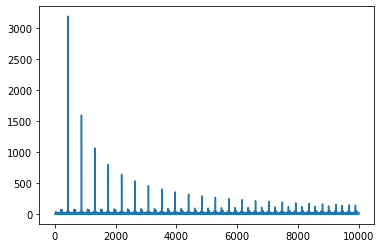

In [66]:
freq=440
saw_tooth_signal = SawtoothSignal(freq=freq)
saw_tooth_signal_wave = saw_tooth_signal.make_wave(duration = 0.5, framerate = 20000)
saw_tooth_signal_spectrum = saw_tooth_signal_wave.make_spectrum()
saw_tooth_signal_spectrum.plot()
saw_tooth_signal_wave.make_audio()

Проверим пики:

In [67]:
saw_tooth_signal_spectrum.peaks()[:5]

[(3189.4988034922594, 440.0),
 (1594.7808813553763, 880.0),
 (1063.222232869364, 1320.0),
 (797.4534042461389, 1760.0),
 (638.0005051923131, 2200.0)]

Посмотрим поближе:

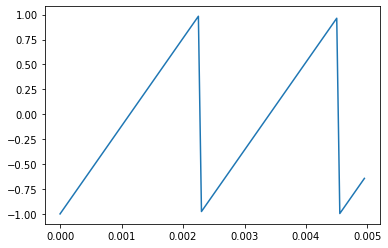

In [68]:
saw_tooth_signal_wave.segment(duration = 0.005).plot()

Используем нашу функцию, написанную в предыдущем пункте, обрежем верзние частоты:

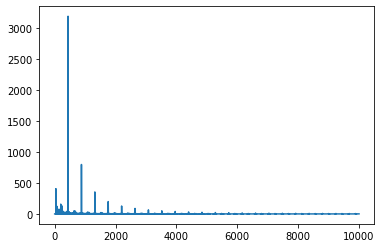

In [69]:
make_diff_spectrum(saw_tooth_signal_spectrum)
saw_tooth_signal_wave = saw_tooth_signal_spectrum.make_wave()
saw_tooth_signal_spectrum.scale(freq)
saw_tooth_signal_spectrum.plot()

Снова посмотрим пики:

In [70]:
saw_tooth_signal_spectrum.peaks()[:5]

[(3189.4988034922585, 440.0),
 (797.3904406776882, 880.0),
 (407.37797840516396, 40.0),
 (354.40741095645467, 1320.0),
 (199.36335106153473, 1760.0)]

Мы получили нужный нам результат, но к сожалению получили артефакты на низких частотах из-за биения. Просто обрежем эти частоты:

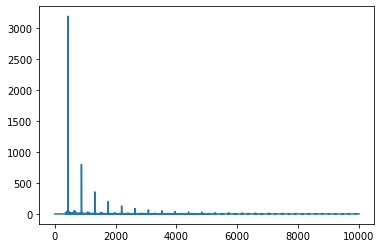

In [71]:
saw_tooth_signal_spectrum.high_pass(350)
saw_tooth_signal_spectrum.plot()

Снова посмотрим пики:

In [72]:
saw_tooth_signal_spectrum.peaks()[:5]

[(3189.4988034922585, 440.0),
 (797.3904406776882, 880.0),
 (354.40741095645467, 1320.0),
 (199.36335106153473, 1760.0),
 (127.6001010384626, 2200.0)]

Построим wave получившегося звука и послушаем его:

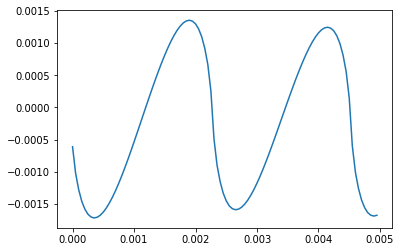

In [73]:
saw_tooth_signal_wave.segment(duration = 0.005).plot()
saw_tooth_signal_wave.make_audio()